In [1]:
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')
print(packagesPath)

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2

/notebooks/Papers/paper2/packages


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import packages.dataset as dataset

datasetPath = os.path.join(dirPath, 'datasets')
dataProcessor = dataset.Brexit(datasetPath)
dataProcessor.loadFilePaths()

Dataset path:
/notebooks/Papers/paper2/datasets/brexit
Total files 48
-------------------------------
Training file count:  38
Total files in list:  38
-------------------------------
Total validation file count 4
Total files in list:  4
-------------------------------
Total test file count 6
Total files in list:  6
-------------------------------


In [3]:
from packages.gc.word2vec import Word2Vec
word2vecProcessor = Word2Vec(dataProcessor)

In [4]:
# 
# print('The skip-gram pairs : target,context')
# for i in range(100):
#     print('(', x_batch[i], word2vecProcessor.id2Word[x_batch[i]],
#           ',', y_batch[i], word2vecProcessor.id2Word[y_batch[i]], ')')
# 

In [5]:
train = False
if train:
    skipWindow = 2
    word2vecProcessor.resetIndex()
    word2vecProcessor.setNumberOfIterations(250)
    word2vecProcessor.setSkipWindow(skipWindow)
    word2vecProcessor.setBatchSize(128)
    word2vecProcessor.train()

5


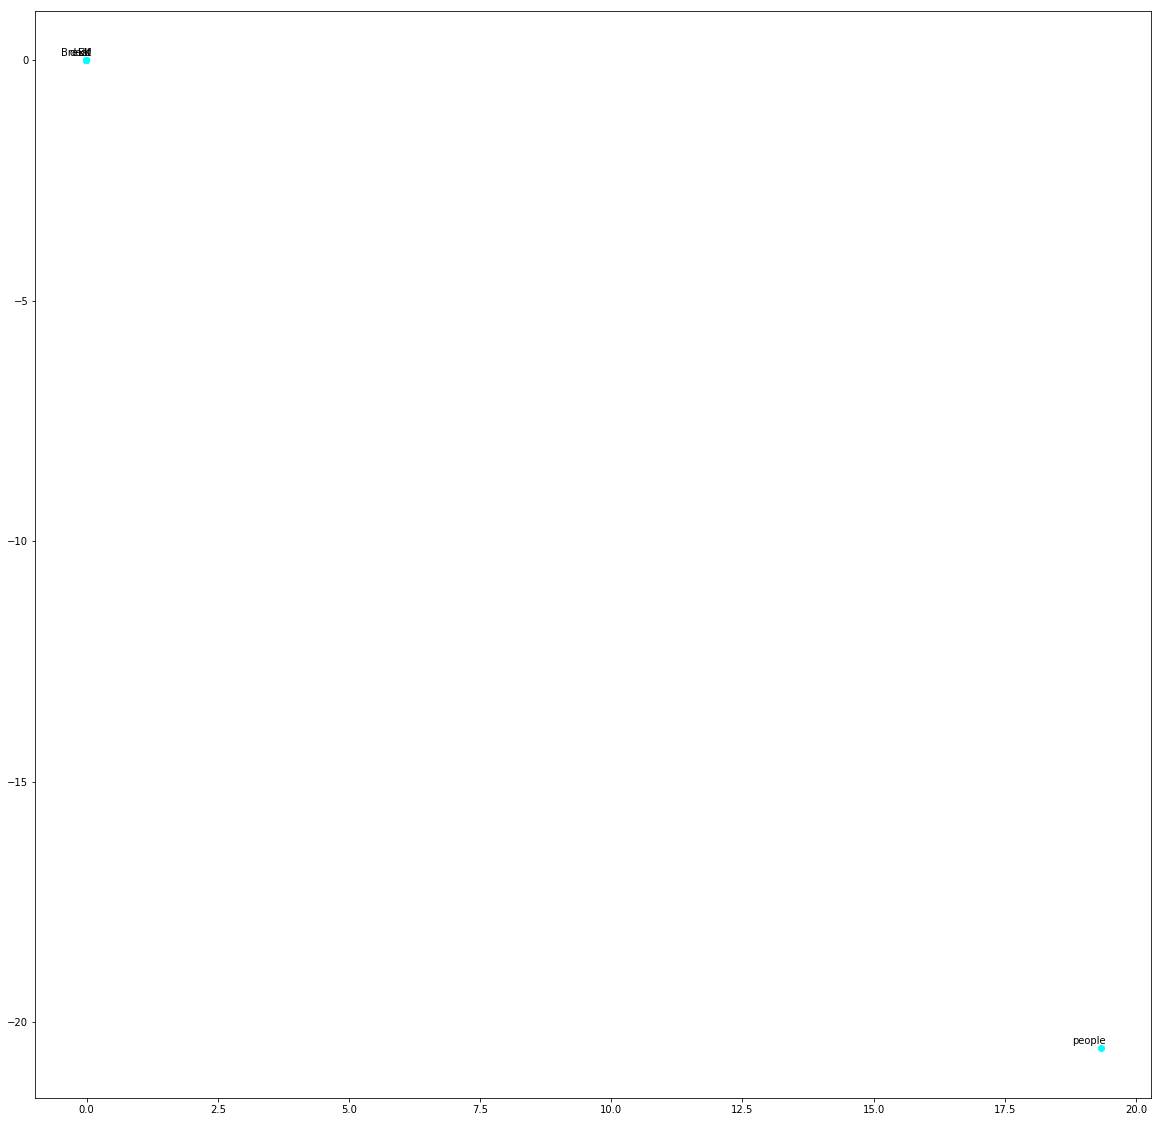

In [6]:
from packages.gc.plotter import Plotter
wordInfo = word2vecProcessor.getPoints(5)
print(len(wordInfo))
    
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

[{'number_of_blocks': 38, 'total_count': 412, 'label': 'Brexit', 'stemmed_word': 'brexit', 'score': 68149, 'appeared': 1548806400, 'index': 3, 'topic': 9, 'x': -0.008204111, 'y': -0.00033251054}, {'number_of_blocks': 36, 'total_count': 244, 'label': 'UK', 'stemmed_word': 'uk', 'score': 22039, 'appeared': 1548806400, 'index': 19, 'topic': 9, 'x': -0.0062510213, 'y': -0.0019864764}, {'number_of_blocks': 36, 'total_count': 233, 'label': 'EU', 'stemmed_word': 'eu', 'score': 27899, 'appeared': 1548806400, 'index': 21, 'topic': 9, 'x': -0.0063492088, 'y': -0.00039245043}, {'number_of_blocks': 33, 'total_count': 249, 'label': 'deal', 'stemmed_word': 'deal', 'score': 39845, 'appeared': 1546560000, 'index': 79, 'topic': 9, 'x': -0.008216094, 'y': -0.0007724921}, {'number_of_blocks': 26, 'total_count': 65, 'label': 'people', 'stemmed_word': 'peopl', 'score': 0, 'appeared': 1548806400, 'index': 36, 'topic': 9, 'x': 19.32575, 'y': -20.543592}, {'number_of_blocks': 25, 'total_count': 92, 'label': '

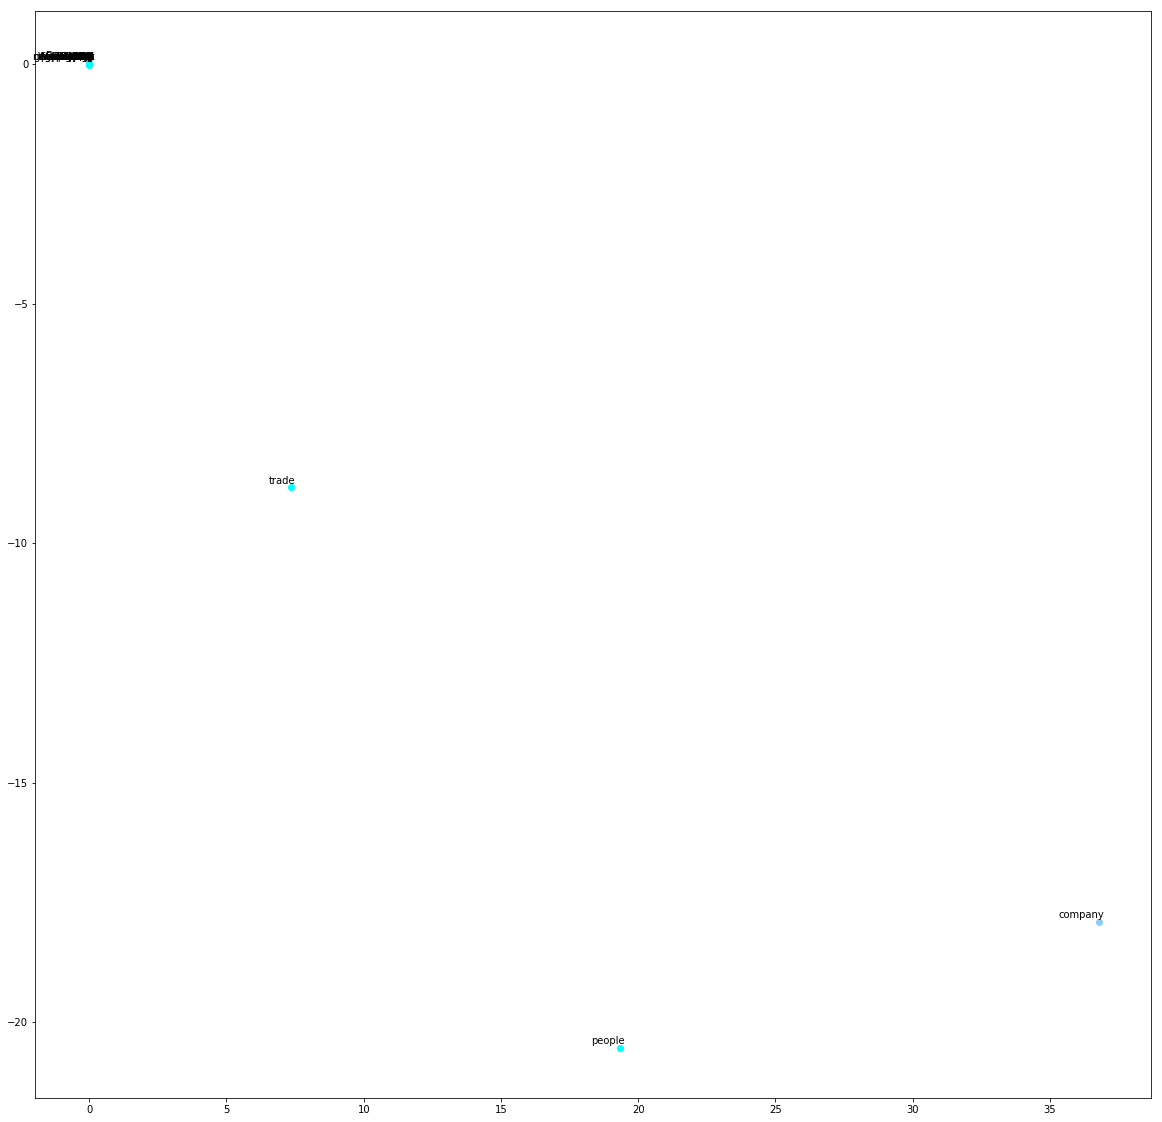

In [8]:
from packages.gc.plotter import Plotter


#word2vecProcessor.setTopicFilter(1)
wordInfo = word2vecProcessor.getPoints(50)
print(wordInfo)
print(len(wordInfo))
    
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()